## simple single point coronavirus predictions
#### using jhu covid data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

loading data

In [2]:
datapath = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

# Choose from "US Cases", "US Deaths", "World Cases", "World Deaths", "World Recoveries"
key = "US Cases" 

if key == "US Cases":
    datapath = datapath + "time_series_covid19_confirmed_US.csv"
elif key == "US Deaths":
    datapath = datapath + "time_series_covid19_deaths_US.csv"
elif key == "World Cases":
    datapath = datapath + "time_series_covid19_confirmed_global.csv"
elif key == "World Deaths":
    datapath = datapath + "time_series_covid19_deaths_global.csv"
elif key == "World Recoveries":
    datapath = datapath + "time_series_covid19_recovered_global.csv"

In [3]:
covid_df = pd.read_csv(datapath)

In [4]:
covid_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,172,175,175,177,179,179,179,179,179,180
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,22,22,23,24,26,26,26,27,28,30
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,70,70,70,71,71,71,71,71,71


In [5]:
abridged_covid_df = covid_df.loc[:,'3/22/20':]

In [6]:
abridged_covid_df.index

RangeIndex(start=0, stop=3261, step=1)

In [8]:
abridged_covid_df.index = covid_df['Province_State']

In [9]:
abridged_covid_df

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guam,27,29,32,37,45,51,55,56,58,69,...,172,175,175,177,179,179,179,179,179,180
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,2,...,22,22,23,24,26,26,26,27,28,30
Puerto Rico,23,31,39,51,64,79,100,127,174,239,...,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185
Virgin Islands,6,7,17,17,17,19,22,23,30,30,...,69,70,70,70,71,71,71,71,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utah,0,0,0,0,0,0,0,0,0,0,...,38,38,38,39,39,42,45,46,51,48
Utah,0,0,0,0,0,0,0,0,0,0,...,24,24,26,26,26,26,26,26,26,28
Utah,0,0,0,0,0,0,0,0,0,0,...,440,454,476,498,524,554,584,616,637,655


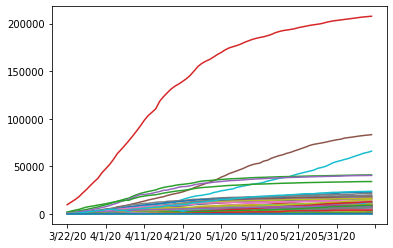

In [10]:
abridged_covid_df.T.plot(legend=False)

In [11]:
abridged_covid_df = abridged_covid_df.sort_values(by=['6/9/20'], ascending=False)
abridged_covid_df = abridged_covid_df.iloc[1:140,:]
abridged_covid_df

,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Illinois,805,922,1194,1418,1418,2239,2613,3445,3727,4496,...,77925,78495,79673,80204,80713,81344,81924,82427,82819,83271
California,407,536,662,812,1229,1465,1465,1829,2474,3019,...,55001,56011,57219,58261,59692,61068,62382,63844,64690,65945
New York,1900,2442,2869,3285,3914,4657,5537,6445,7344,8544,...,40396,40479,40572,40644,40713,40797,40853,40904,40947,40980
New York,1034,1458,1880,2260,2735,3385,4138,5023,5791,6713,...,39643,39705,39980,40062,40153,40239,40278,40329,40377,40426
New York,1873,2894,3891,4691,5944,7187,7875,8519,9326,9967,...,33481,33552,33633,33691,33767,33854,33924,33954,34000,34035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New Jersey,5,6,6,12,10,14,17,24,29,31,...,2214,2222,2251,2284,2286,2309,2330,2364,2383,2401
Wisconsin,3,3,3,3,4,5,6,6,7,9,...,2319,2320,2334,2350,2361,2369,2374,2377,2377,2399
Colorado,51,55,73,93,131,158,182,213,253,304,...,2221,2244,2266,2294,2310,2343,2370,2373,2384,2398


In [12]:
abridged_covid_df = abridged_covid_df.sample(frac=1)
flattened_df = abridged_covid_df.to_numpy().flatten()
covid_data = flattened_df
num_regions = abridged_covid_df.shape[0]; print(num_regions)
num_days = abridged_covid_df.shape[1]; print(num_days)

139
80


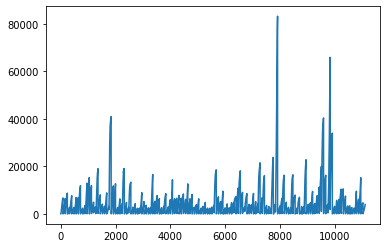

In [13]:
plt.plot(covid_data)
plt.show()

In [14]:
train_end_index = int(len(covid_data) * 0.8) ; train_end_index # about 70 percent for training

8896

In [15]:
# this code is directly from https://www.tensorflow.org/tutorials/structured_data/time_series

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
    
  return np.array(data), np.array(labels)

In [16]:
# time to scale these features and standardize using training data
"""
train_data_mean = covid_data[:train_end_index].mean()
train_data_std = covid_data[:train_end_index].std()
print(train_data_mean, train_data_std)
covid_data = (covid_data - train_data_mean)/train_data_std
"""
covid_data = covid_data + 0.0

In [17]:
# choose {covid_past_history} vals to use to predict {covid_future_target + 1} vals into the future
covid_past_history = 14
covid_future_target = 0

x_train_covid, y_train_covid = univariate_data(covid_data, 0, train_end_index, covid_past_history, covid_future_target)

x_val_covid, y_val_covid = univariate_data(covid_data, train_end_index, None, covid_past_history, covid_future_target)

In [18]:
print(x_train_covid.shape, y_train_covid.shape)
print(x_train_covid.shape[-2:])

(8882, 14, 1) (8882,)
(14, 1)


In [19]:
print(x_val_covid.shape, y_val_covid.shape)

(2210, 14, 1) (2210,)


### Need to clean this training data up for it to work with this covid data, removing the bogus sequences

In [22]:
def clean_data_covid(x_data, y_data, num_days, history):
    index = num_days - history
    index_range = np.array([])
    
    while index < len(x_data):
        index_range = np.append(index_range, np.arange(index, index + history))
        index = index + history + num_days
    
    x_data = np.delete(x_data, index_range.astype(int), 0)
    y_data = np.delete(y_data, index_range.astype(int), 0)
    
    return x_data, y_data

In [23]:
x_train_covid, y_train_covid = clean_data_covid(x_train_covid, y_train_covid, 
                                                num_days, covid_past_history)

Past history example:
 [[2058.]
 [2113.]
 [2182.]
 [2182.]
 [2182.]
 [2329.]
 [2432.]
 [2562.]
 [2629.]
 [2902.]
 [2902.]
 [3015.]
 [3078.]
 [3153.]]
using this history to predict the val:  3198.0


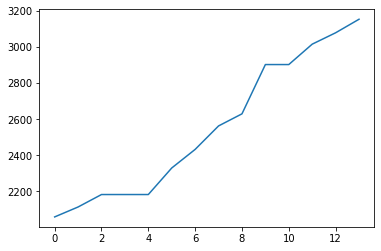

In [25]:
index = 105
print("Past history example:\n", x_train_covid[index])
print("using this history to predict the val: ", y_train_covid[index])
plt.plot(x_train_covid[index])

In [26]:
# much of below code is derived from https://www.tensorflow.org/tutorials/structured_data/time_series

BATCH_SIZE = num_days

train_covid = tf.data.Dataset.from_tensor_slices((x_train_covid, y_train_covid))
train_covid = train_covid.cache().batch(BATCH_SIZE).repeat()

val_covid = tf.data.Dataset.from_tensor_slices((x_val_covid, y_val_covid))
val_covid = val_covid.batch(BATCH_SIZE).repeat()

In [27]:
# creating the neural network model

lstm_prediction_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=x_train_covid.shape[-2:], return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

In [28]:
lstm_prediction_model.compile(optimizer='adam', loss='mae')

In [29]:
lstm_prediction_model.fit(train_covid, epochs=15, steps_per_epoch=150, validation_data=val_covid, validation_steps=50)

Train for 150 steps, validate for 50 steps
Epoch 1/15
150/150 [==============================] - 20s 134ms/step - loss: 2875.2426 - val_loss: 4206.0275
Epoch 2/15
150/150 [==============================] - 15s 98ms/step - loss: 2169.5426 - val_loss: 3637.4011
Epoch 3/15
150/150 [==============================] - 15s 99ms/step - loss: 1784.9742 - val_loss: 4817.4546
Epoch 4/15
150/150 [==============================] - 15s 99ms/step - loss: 2191.0127 - val_loss: 3348.1995
Epoch 5/15
150/150 [==============================] - 15s 100ms/step - loss: 2047.0118 - val_loss: 3600.8207
Epoch 6/15
150/150 [==============================] - 15s 100ms/step - loss: 2088.6965 - val_loss: 4084.6015
Epoch 7/15
150/150 [==============================] - 15s 99ms/step - loss: 1815.5053 - val_loss: 3643.9674
Epoch 8/15
150/150 [==============================] - 15s 99ms/step - loss: 1794.1792 - val_loss: 3563.8165
Epoch 9/15
150/150 [==============================] - 15s 99ms/step - loss: 2268.8121 - va

In [30]:
def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

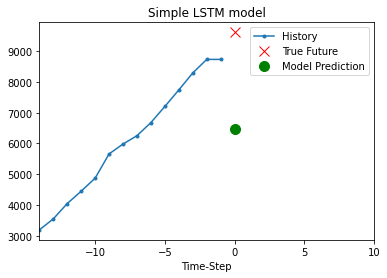

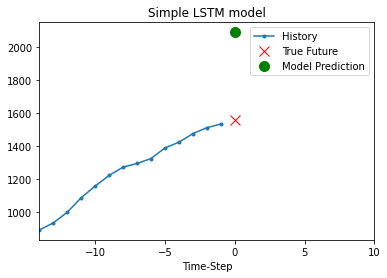

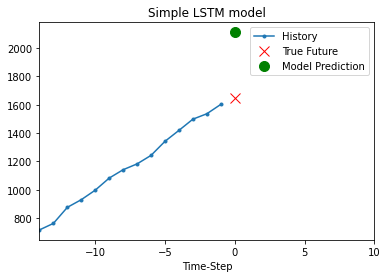

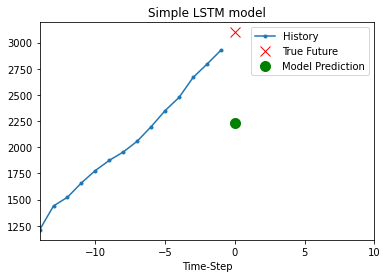

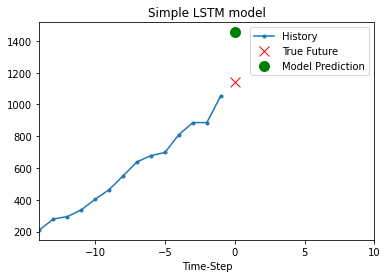

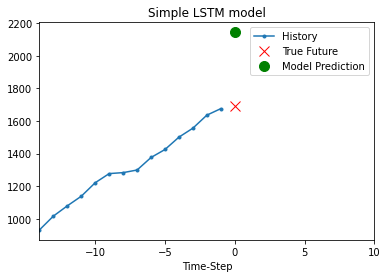

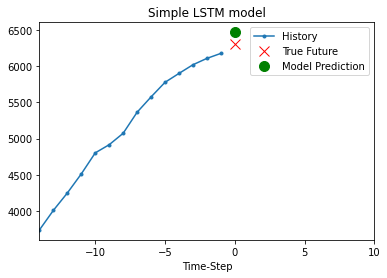

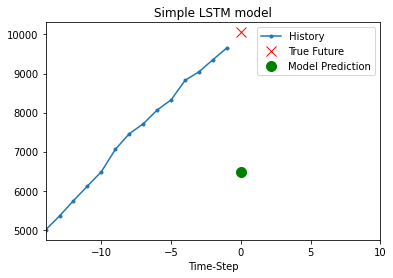

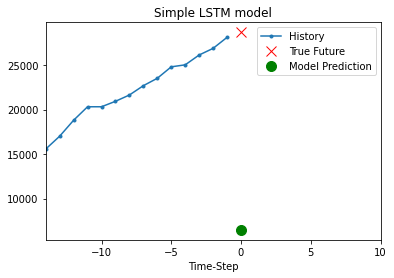

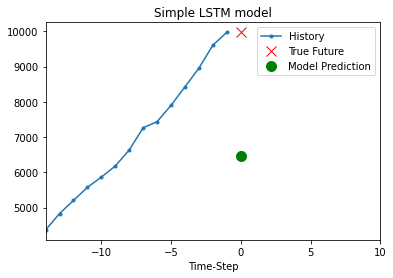

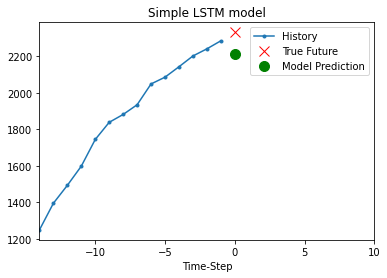

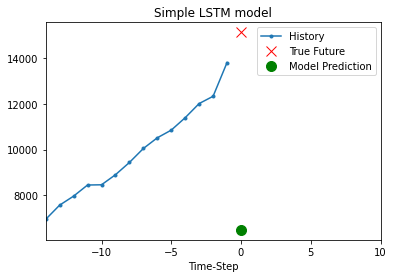

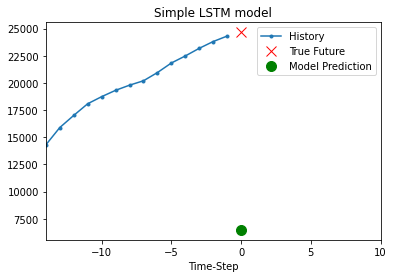

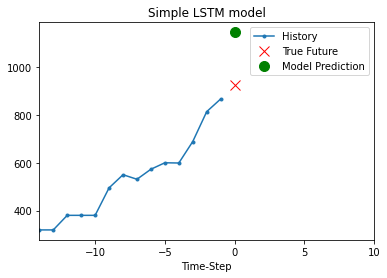

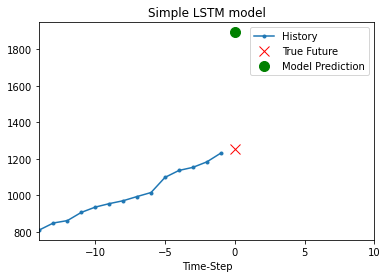

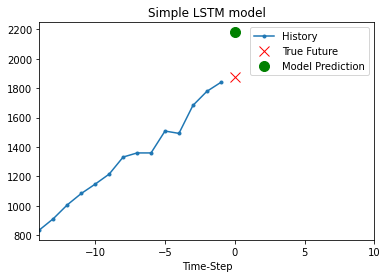

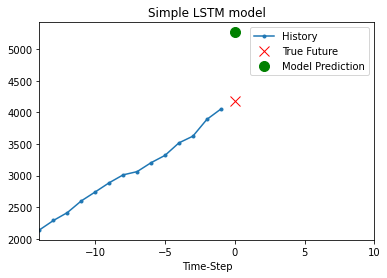

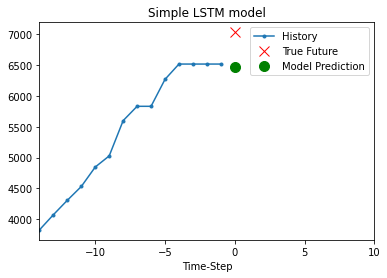

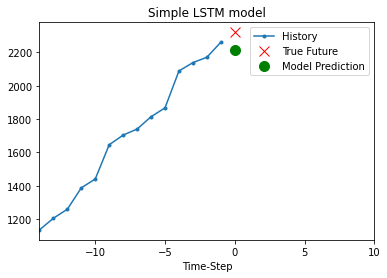

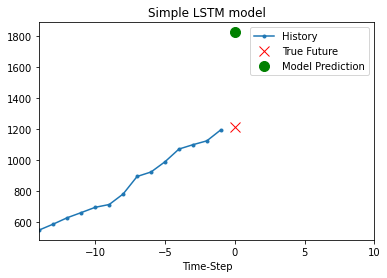

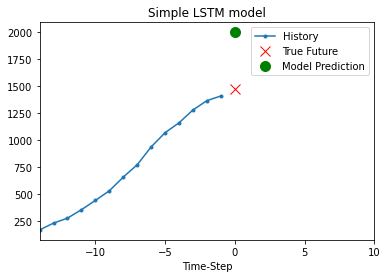

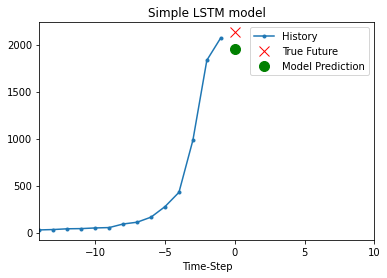

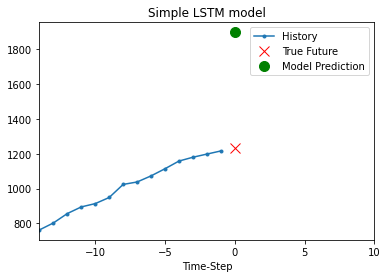

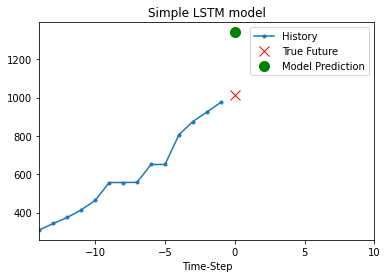

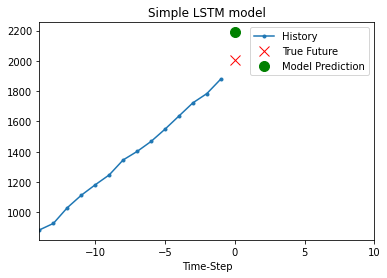

In [31]:
for x, y in val_covid.take(25):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    lstm_prediction_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()